In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', UserWarning)

In [3]:
data = pd.read_csv('https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_RapportINSPQ_HistoVigie.csv', skiprows = [1])

data.head()

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
0,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

data.rename(columns = {
    'Nb_Nvx_Cas':'Nb_New_Cases'
}, inplace = True)

In [5]:
data_2020_2021 = data[data['Date'].dt.year < 2022]

In [6]:
data_march = data_2020_2021[(data_2020_2021['Date'].dt.month == 3) | (data_2020_2021['Date'].dt.month == 4)][['Date', 'Nb_New_Cases']]

date1 = data_march[(data_march['Date'] >= '2020-03-20') & (data_march['Date'] <= '2020-04-16')]

In [7]:
date_september = data_2020_2021[(data_2020_2021['Date'].dt.month == 8) | (data_2020_2021['Date'].dt.month == 9)][['Date', 'Nb_New_Cases']]

date2 = date_september[(date_september['Date'] >= '2020-08-31') & (date_september['Date'] <= '2020-09-27')]

In [8]:
date_december = data_2020_2021[((data_2020_2021['Date'].dt.month == 1) & (data_2020_2021['Date'].dt.year == 2021)) | ((data_2020_2021['Date'].dt.month == 12) & (data_2020_2021['Date'].dt.year == 2020))][['Date', 'Nb_New_Cases']]

date3 = date_december[(date_december['Date'] >= '2020-12-25') & (date_december['Date'] <= '2021-01-21')]

In [9]:
dates = (date1, date2, date3)

title = (
    'New covid cases after the lockdown in March',
    'New covid cases after the reopening of schools in August',
    'New covid cases after the lockdown in December'
)

sub_titles = (
    ('Before March lockdown', 'After March lockdown'), 
    ('Before school opening', 'After school opening'), 
    ('Before December lockdown', 'After December lockdown')
)

vertical_thresholds = (
    pd.to_datetime('2020-04-02'),
    pd.to_datetime('2020-09-13'),
    pd.to_datetime('2021-01-07'),
)

text_x_location = (
    (pd.to_datetime('2020-03-20'), pd.to_datetime('2020-04-04')),
    (pd.to_datetime('2020-08-30'), pd.to_datetime('2020-09-15')),
    (pd.to_datetime('2020-12-25'), pd.to_datetime('2021-01-09')),
)

text_y_location = (
    (1000, 150),
    (900, 150),
    (1500, 3100),
)

texts = (
    ('Cases of people who got infected before lockdown', 'Cases of people who got infected after lockdown'),
    ('Cases of people who got infected before school opening', 'Cases of people who got infected after school opening'),
    ('Cases of people who got infected before lockdown', 'Cases of people who got infected after lockdown'),
)

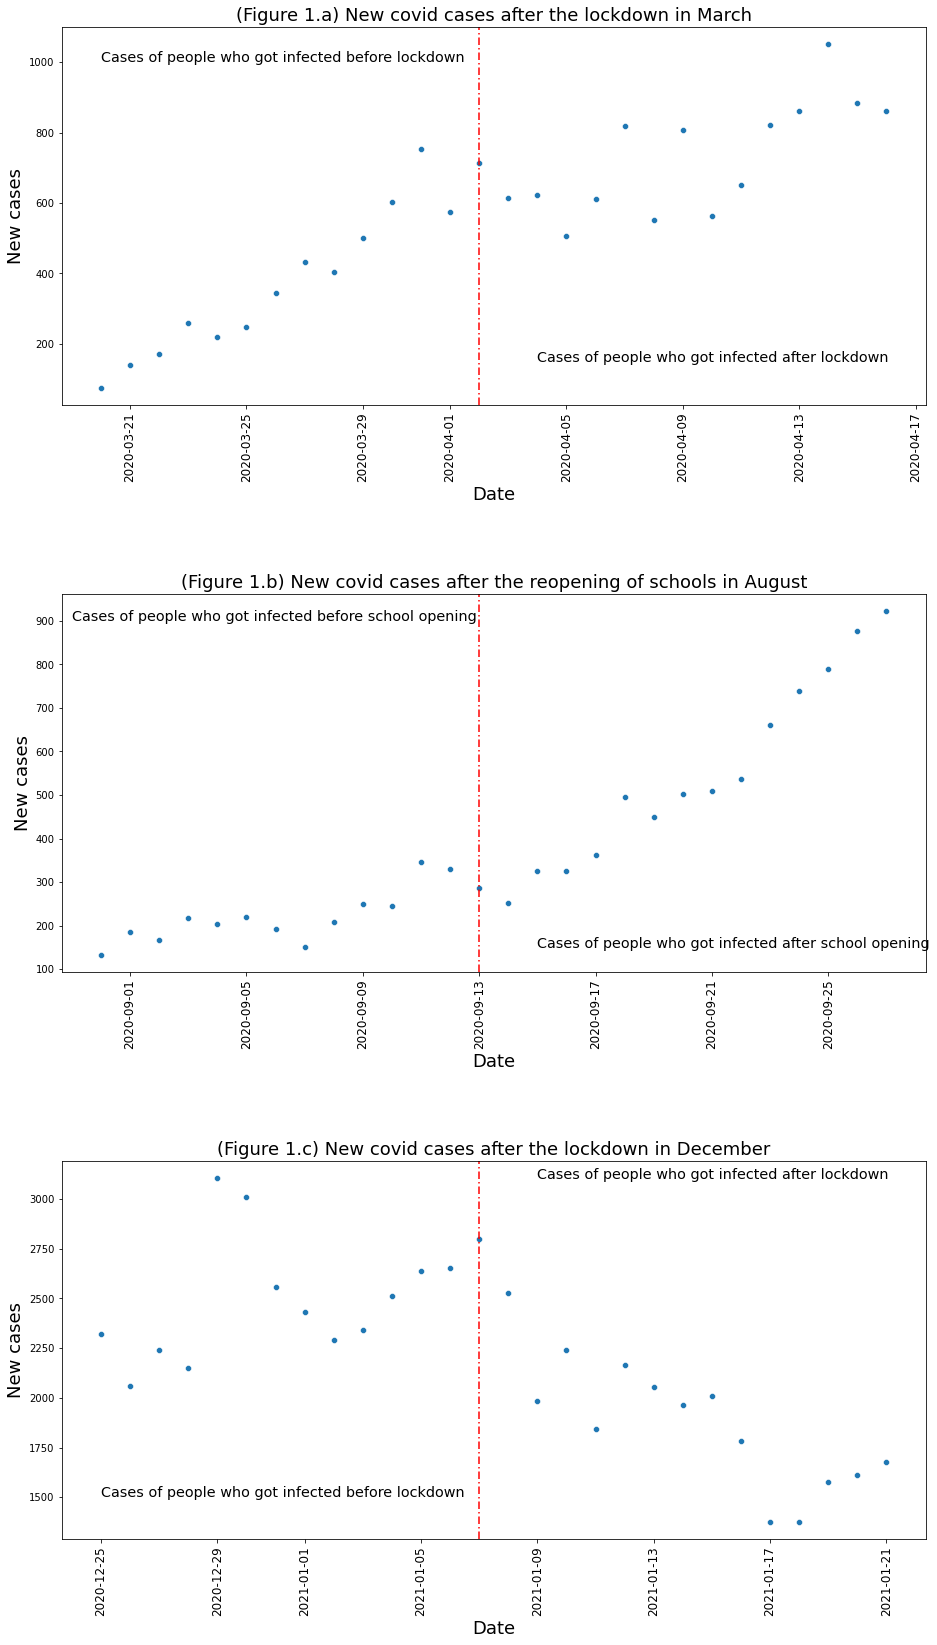

In [58]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)

fig_nums = ('(Figure 1.a) ','(Figure 1.b) ','(Figure 1.c) ')

for i in range(3):

    sns.scatterplot(data = dates[i], x = 'Date', y = 'Nb_New_Cases', ax = ax[i])

    ax[i].axvline(vertical_thresholds[i], color = 'red', dashes = (5, 2, 1, 2))

    ax[i].set_title(fig_nums[i]+title[i], fontsize = 18)

    ax[i].set_ylabel('New cases', fontsize = 18)

    ax[i].set_xlabel('Date', fontsize = 18)

    ax[i].tick_params(axis='x', labelrotation = 90, labelsize = 'large')
    
    ax[i].text(x = text_x_location[i][0], y = text_y_location[i][0], s = texts[i][0], size = 'x-large')
    
    ax[i].text(x = text_x_location[i][1], y = text_y_location[i][1], s = texts[i][1], size = 'x-large')

plt.show()

In [11]:
date1_pre = date1[(date1['Date'] >= '2020-03-20') & (date1['Date'] <= '2020-04-02')][['Nb_New_Cases']]

date1_post = date1[(date1['Date'] > '2020-04-02') & (date1['Date'] <= '2020-04-16')][['Nb_New_Cases']]

date2_pre = date2[(date2['Date'] >= '2020-08-31') & (date2['Date'] <= '2020-09-13')][['Nb_New_Cases']]

date2_post = date2[(date2['Date'] > '2020-09-13') & (date2['Date'] <= '2020-09-27')][['Nb_New_Cases']]

date3_pre = date3[(date3['Date'] >= '2020-12-25') & (date3['Date'] <= '2021-01-07')][['Nb_New_Cases']]

date3_post = date3[(date3['Date'] > '2020-01-07') & (date3['Date'] <= '2021-01-21')][['Nb_New_Cases']]


In [12]:
data = (
    (date1_pre, date1_post),
    (date2_pre, date2_post),
    (date3_pre, date3_post)
)

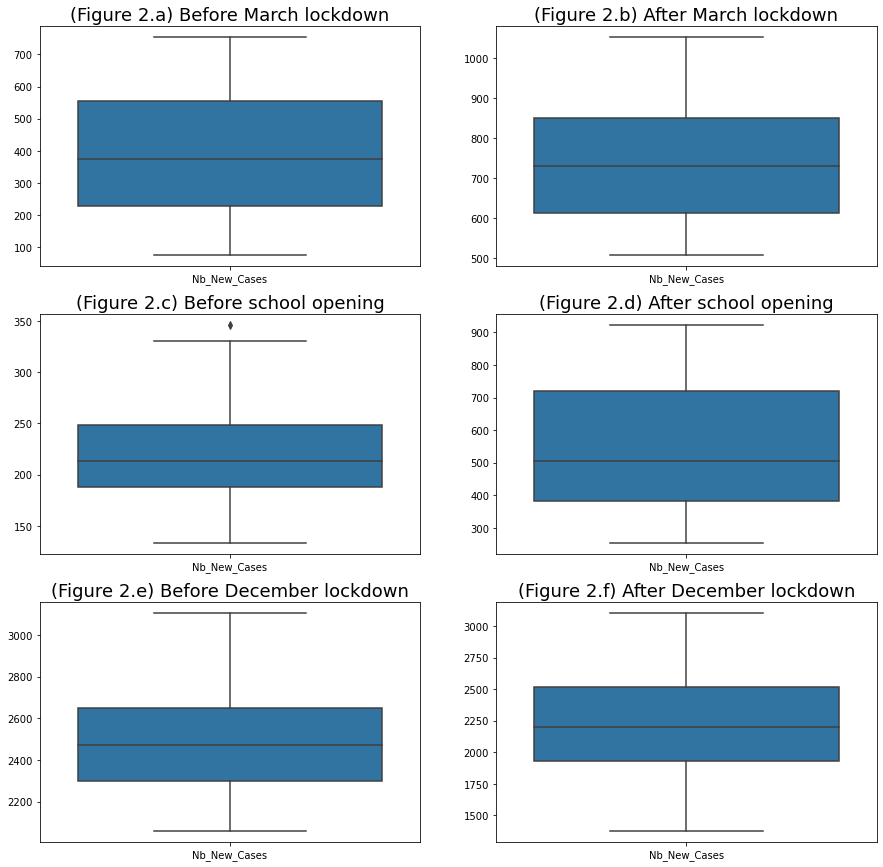

In [61]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

mult_fig_names = (
    ("(Figure 2.a) ", "(Figure 2.b) "),
    ("(Figure 2.c) ", "(Figure 2.d) "),
    ("(Figure 2.e) ", "(Figure 2.f) ")
)

for i in range(3):
    for j in range(2):
        sns.boxplot(data = data[i][j], ax = ax[i][j])
        ax[i][j].set_title(mult_fig_names[i][j] + sub_titles[i][j], fontsize = 18)

plt.show()

In [14]:
date1_time_dummy = date1.assign(
    Time =  np.arange(len(date1.index))
)

date2_time_dummy = date2.assign(
    Time =  np.arange(len(date2.index))
)

date3_time_dummy = date3.assign(
    Time =  np.arange(len(date3.index))
)

dates_time_dummy = (date1_time_dummy, date2_time_dummy, date3_time_dummy)

In [15]:
x1_pre = date1_time_dummy.iloc[:14,2]
x1_post = date1_time_dummy.iloc[13:,2]
y1_pre = date1_time_dummy.iloc[:14,1]
y1_post = date1_time_dummy.iloc[13:,1]

x2_pre = date2_time_dummy.iloc[:14,2]
x2_post = date2_time_dummy.iloc[13:,2]
y2_pre = date2_time_dummy.iloc[:14,1]
y2_post = date2_time_dummy.iloc[13:,1]

x3_pre = date3_time_dummy.iloc[:14,2]
x3_post = date3_time_dummy.iloc[13:,2]
y3_pre = date3_time_dummy.iloc[:14,1]
y3_post = date3_time_dummy.iloc[13:,1]

In [108]:
regression_data = (
    ((x1_pre, y1_pre),(x1_post, y1_post)),
    ((x2_pre, y2_pre),(x2_post, y2_post)),
    ((x3_pre, y3_pre), (x3_post, y3_post)),
)

In [112]:
for i in range(3):
    for j in range(2):
        print(sub_titles[i][j], sm.OLS(regression_data[i][j][1], sm.add_constant(regression_data[i][j][0])).fit().summary(), end = "\n\n\n\n")

        print(''.center(87, '*'))

Before March lockdown                             OLS Regression Results                            
Dep. Variable:           Nb_New_Cases   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     161.0
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           2.59e-08
Time:                        06:45:56   Log-Likelihood:                -75.954
No. Observations:                  14   AIC:                             155.9
Df Residuals:                      12   BIC:                             157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.0000     30.0

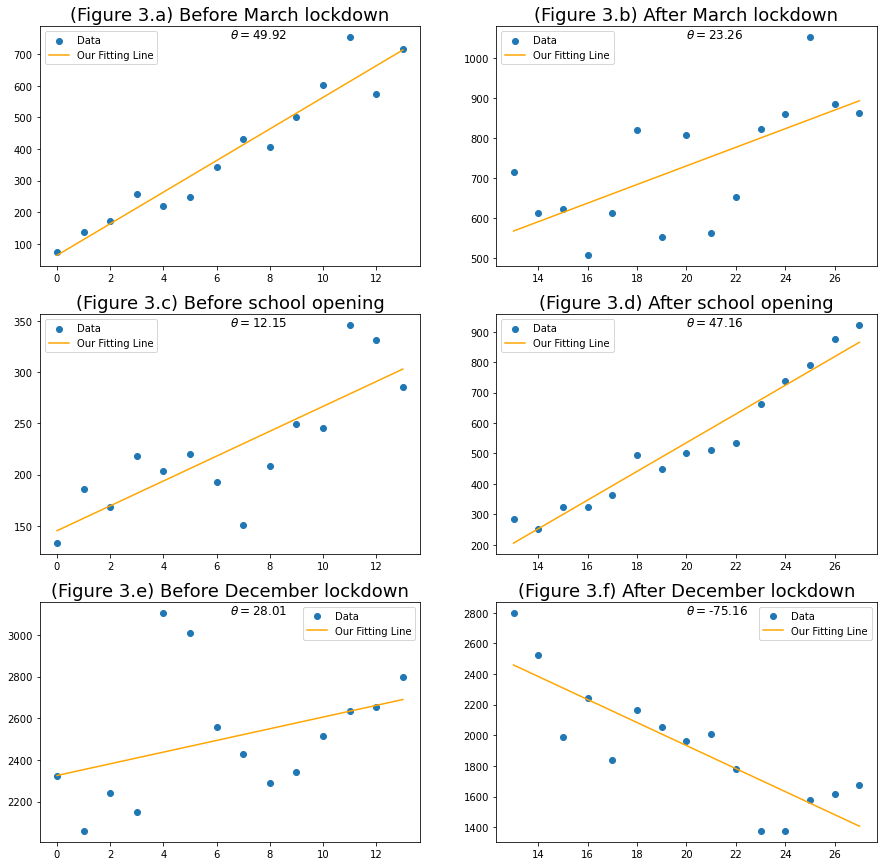

In [116]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

reg_fig_names = (
    ("(Figure 3.a) ", "(Figure 3.b) "),
    ("(Figure 3.c) ", "(Figure 3.d) "),
    ("(Figure 3.e) ", "(Figure 3.f) ")
)

lr = LinearRegression()

for i in range(3):
    for j in range(2):
        
        if regression_data[i][j][0].size == 14:

            lr.fit(regression_data[i][j][0].values.reshape(14,-1), regression_data[i][j][1])
            
        else:
            
            lr.fit(regression_data[i][j][0].values.reshape(15,-1), regression_data[i][j][1])

        temp_co = lr.coef_

        temp_inter = lr.intercept_

        ax[i][j].scatter(x = regression_data[i][j][0], y = regression_data[i][j][1], label='Data')
        
        ax[i][j].plot( regression_data[i][j][0], regression_data[i][j][0] * temp_co + temp_inter, color = 'orange', label='Our Fitting Line')
        
        ax[i][j].legend(loc='best')
        
        ax[i][j].text(x = 0.5, y = 0.95, s = r'${\theta=}$' + str(float(np.round(temp_co,2))),transform=ax[i][j].transAxes, fontsize = 12)
        
        ax[i][j].set_title(reg_fig_names[i][j]+sub_titles[i][j], fontsize = 18)

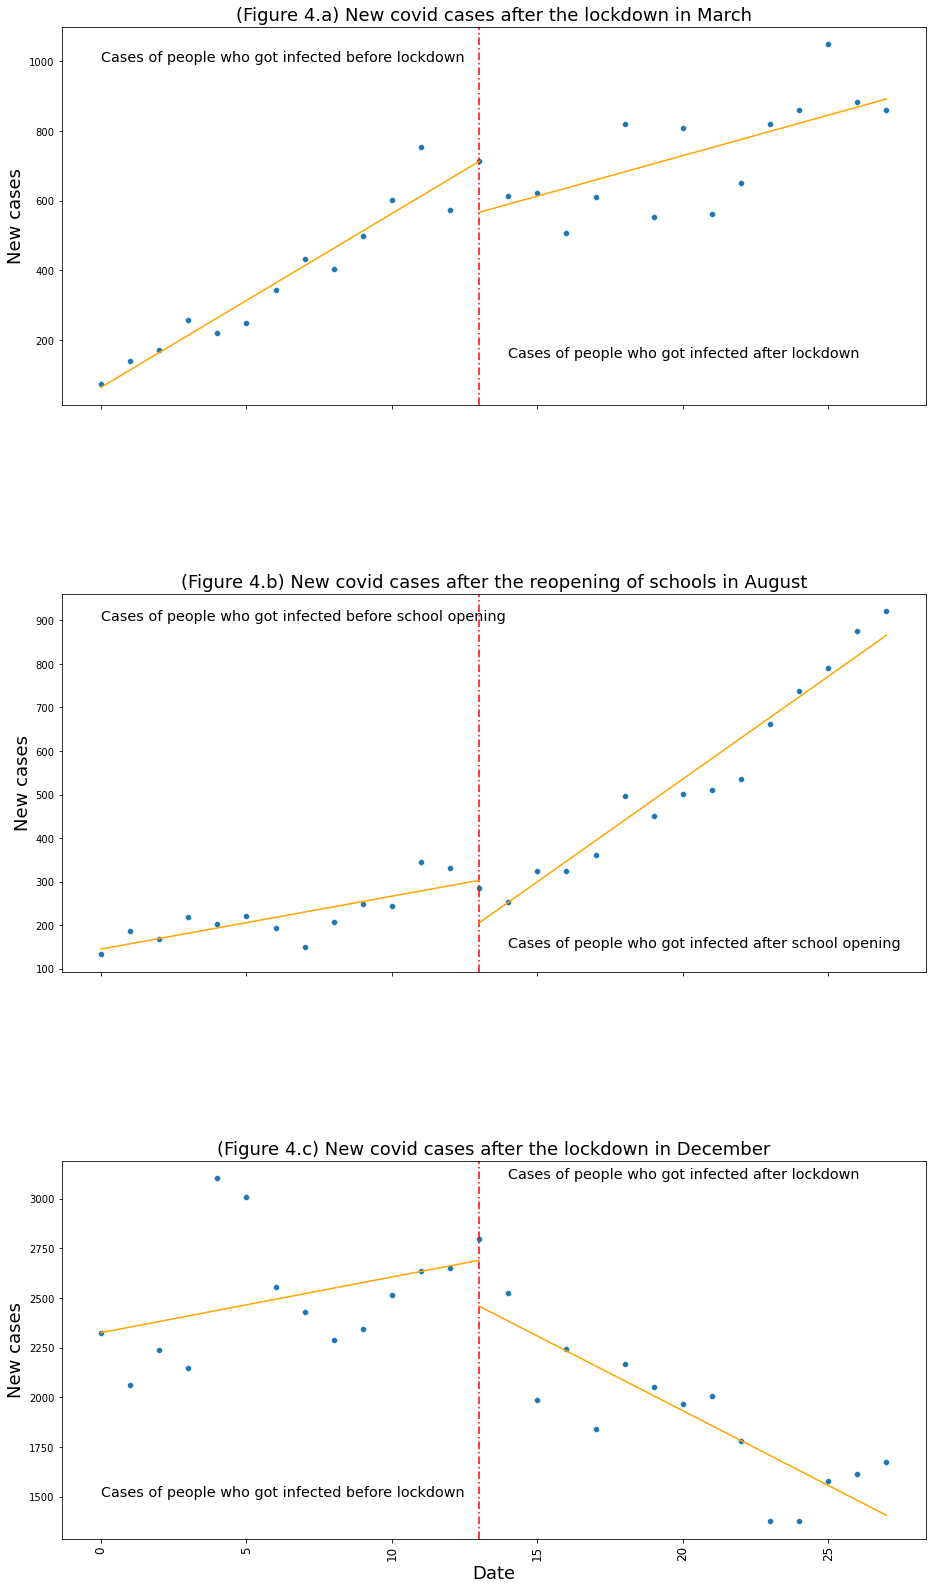

In [63]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15), sharex = True)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)

rdd_nums = ('(Figure 4.a) ','(Figure 4.b) ','(Figure 4.c) ')

for i in range(3):

    sns.scatterplot(data = dates_time_dummy[i], x = 'Time', y = 'Nb_New_Cases', ax = ax[i])

    ax[i].axvline(dates_time_dummy[i].iloc[13]['Time'], color = 'red', dashes = (5, 2, 1, 2))

    ax[i].set_title(rdd_nums[i]+title[i], fontsize = 18)

    ax[i].set_ylabel('New cases', fontsize = 18)

    ax[i].set_xlabel('Date', fontsize = 18)

    ax[i].tick_params(axis='x', labelrotation = 90, labelsize = 'large')
    
    ax[i].text(x = dates_time_dummy[i].iloc[0]['Time'], y = text_y_location[i][0], s = texts[i][0], size = 'x-large')
    
    ax[i].text(x = dates_time_dummy[i].iloc[14]['Time'], y = text_y_location[i][1], s = texts[i][1], size = 'x-large')
    
    lr.fit(regression_data[i][0][0].values.reshape(14,-1), regression_data[i][0][1])
    
    temp_co = lr.coef_

    temp_inter = lr.intercept_
    
    ax[i].plot(regression_data[i][0][0], regression_data[i][0][0] * temp_co + temp_inter, color = 'orange')
    
    lr.fit(regression_data[i][1][0].values.reshape(15,-1), regression_data[i][1][1])
    
    temp_co = lr.coef_

    temp_inter = lr.intercept_
    
    ax[i].plot(regression_data[i][1][0], regression_data[i][1][0] * temp_co + temp_inter, color = 'orange')

plt.show()